# Step 1: Importing Modules

In [2]:
# importing all the variables for the Bike Sharing objective
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from scipy.stats import probplot
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

# Step 2: Loading Data and pre checks

In [4]:
# Reading the data set
bike_df = pd.read_csv('day.csv')

In [5]:
#  Checking first few lines of data set.
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the columns and data types
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#  not null handling not required as all the columns have 730 rows. 

In [8]:
#  Changing the data type of dteday which has the date, but currently set is object 
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y')
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
# Below are the data dictionary 
# - instant: record index
# 	- dteday : date
# 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2018, 1:2019)
# 	- mnth : month ( 1 to 12)
# 	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# 	- temp : temperature in Celsius
# 	- atemp: feeling temperature in Celsius
# 	- hum: humidity
# 	- windspeed: wind speed
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

In [10]:
#  Analyzing categorical variables.
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
# dropping the duplicates

bike_df.drop_duplicates(inplace=True)
bike_df.shape

(730, 16)

- No duplicate record in the dataset

In [13]:
#  getting logically interpreted numerical variables and preparing the categorical variables. 
num_cols=["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['mnth'] = bike_df['mnth'].map({1: 'Jan',2: 'Feb', 3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec' })
bike_df['weekday']= bike_df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear',2: 'Mist  & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Snow & Rain'})

cat_cols = ['season','mnth','weekday','weathersit']

In [14]:
#  removing the index record -instant and date as this information is already available.
#  Also removing the not required columns as the information is available in 'cnt' col and date is not required
# bike_df.columns
bike_df = bike_df.drop(['instant','dteday','registered', 'casual'],axis =1)

In [15]:
# Checking the first few lines of the dataset after column drop
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3: EDA and Data Visualization

**- Univariate**

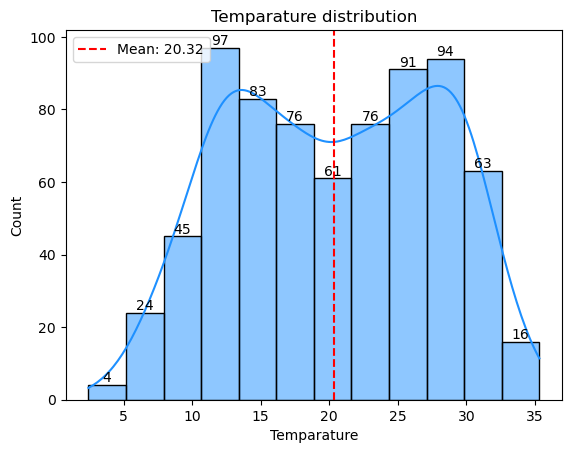

In [18]:
# Temperature histogram plot
ax = sns.histplot(data=bike_df['temp'], kde=True,color="dodgerblue")
plt.xlabel("Temparature")
plt.title('Temparature distribution')
# Calculate and display the mean
mean_value = np.mean(bike_df['temp'])
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend(loc = 'upper left')
for p in ax.patches:
    # Get the height and width of each bar
    height = p.get_height()
    # Get the x position of the bar
    x = p.get_x() + p.get_width() / 2
    # Annotate the bar with the count
    ax.annotate(f'{int(height)}', 
                (x, height), 
                ha='center', 
                va='bottom', 
                fontsize=10)
plt.show()

**Understanding from the above plot**
-   The temperature mean is around 20 degrees with two peaks around 100. The temperature is around 12.5 and 30 respectively. 

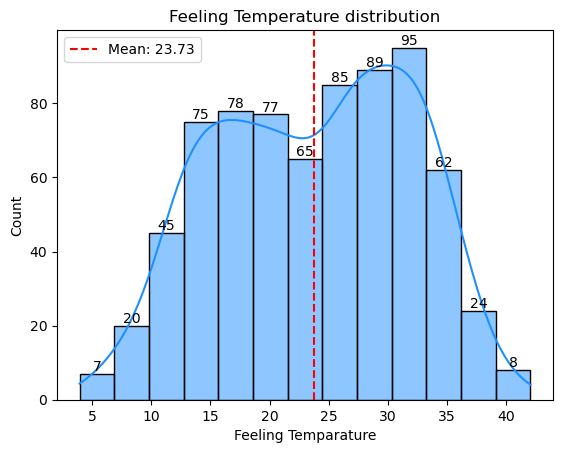

In [20]:
# Felling temperature histogram plot
ax = sns.histplot(data=bike_df['atemp'], kde=True,color="dodgerblue")
plt.xlabel("Feeling Temparature")
plt.title('Feeling Temperature distribution')
# Calculate and display the mean
mean_value = np.mean(bike_df['atemp'])
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend(loc = 'upper left')
for p in ax.patches:
    # Get the height and width of each bar
    height = p.get_height()
    # Get the x position of the bar
    x = p.get_x() + p.get_width() / 2
    # Annotate the bar with the count
    ax.annotate(f'{int(height)}', 
                (x, height), 
                ha='center', 
                va='bottom', 
                fontsize=10)
plt.show()

**Understanding from the above plot**
-   The temperature mean is around 23 degrees and the trend is going up from 25 to 30 degrees.

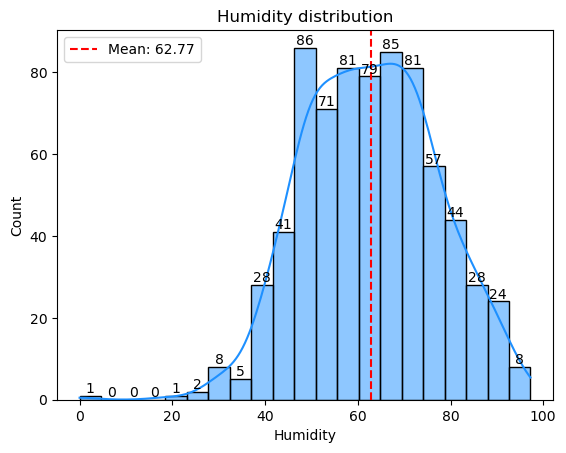

In [22]:
#  Humidity histogram plot
ax = sns.histplot(data=bike_df['hum'], kde=True,color="dodgerblue")
plt.xlabel("Humidity")
plt.title('Humidity distribution')
# Calculate and display the mean
mean_value = np.mean(bike_df['hum'])
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.legend(loc = 'upper left')
for p in ax.patches:
    # Get the height and width of each bar
    height = p.get_height()
    # Get the x position of the bar
    x = p.get_x() + p.get_width() / 2
    # Annotate the bar with the count
    ax.annotate(f'{int(height)}', 
                (x, height), 
                ha='center', 
                va='bottom', 
                fontsize=10)
plt.show()

**Understanding from the above plot**
-   The Humidity mean is around 62 and it is evident the extremes are very rare. The peak is from 50 to 70 range

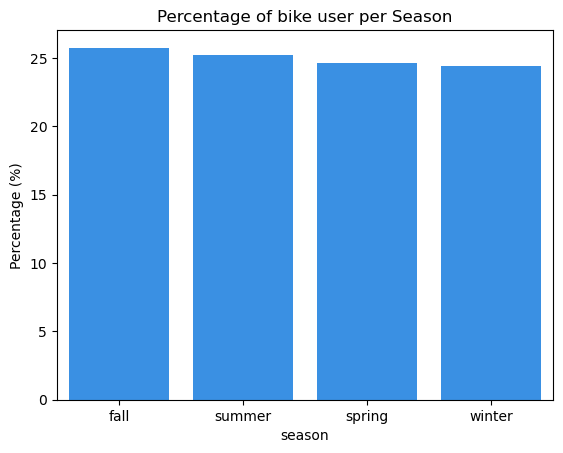

In [24]:
#  Analysis of categorical variable season

category_counts = bike_df['season'].value_counts(normalize=True) * 100
percentage_df = category_counts.reset_index()
percentage_df.columns = ['season', 'percentage']
sns.barplot(x='season', y='percentage', data=percentage_df,color="dodgerblue")
plt.title('Percentage of bike user per Season')
plt.ylabel('Percentage (%)')
plt.show()


**Understanding from the above plot**
-   The percentage of bike users decline gradually from fall to winter as per the above sequence

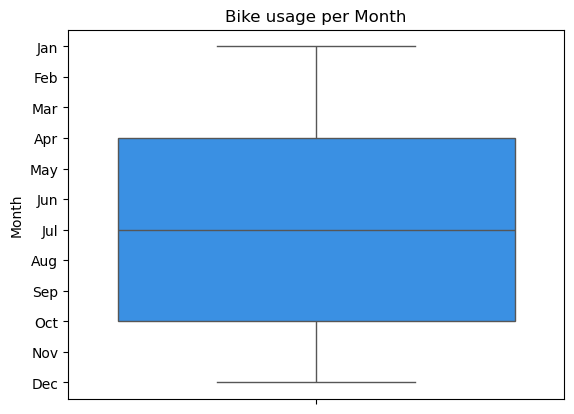

In [26]:
#  Analysis of categorical variable month

sns.boxplot(y='mnth',color="dodgerblue",data=bike_df )
plt.title('Bike usage per Month')
plt.ylabel('Month')
plt.show()


**Understanding from the above plot**
-   The usage plot shows month Apr to Oct are mostly used months. The winter months are not used that much

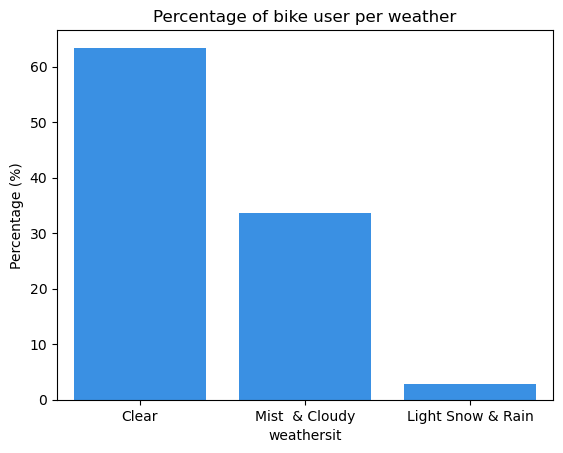

In [28]:
#  Analysis of categorical variable weathersit

category_counts = bike_df['weathersit'].value_counts(normalize=True) * 100
percentage_df = category_counts.reset_index()
percentage_df.columns = ['weathersit', 'percentage']
sns.barplot(x='weathersit', y='percentage', data=percentage_df,color="dodgerblue")
plt.title('Percentage of bike user per weather')
plt.ylabel('Percentage (%)')
plt.show()

**Understanding from the above plot**
-   The weather is impact full, clear sky has more than 60% user base. Followed by Mist and Cloudy. User avoid rainy season.

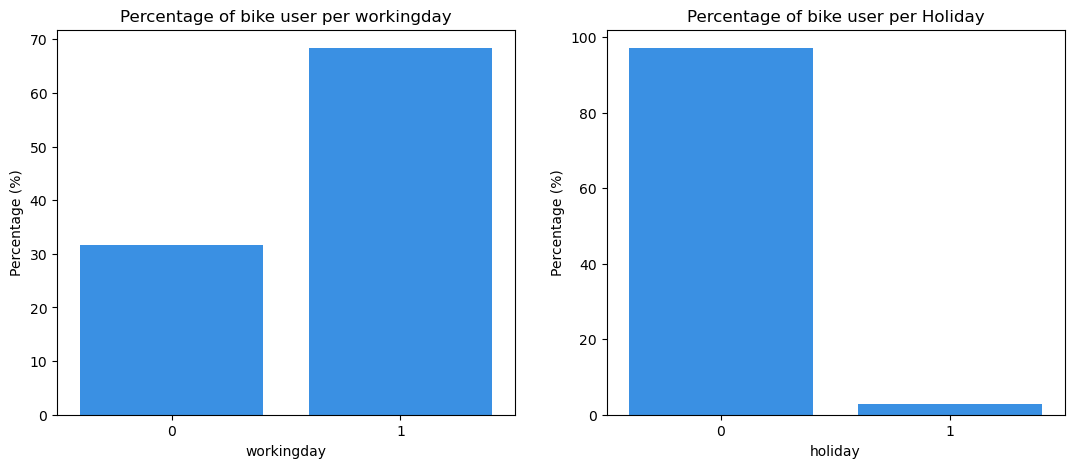

In [30]:
#  Analysis of categorical variable weekday and weekend
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
category_counts = bike_df['workingday'].value_counts(normalize=True) * 100
percentage_df = category_counts.reset_index()
percentage_df.columns = ['workingday', 'percentage']
sns.barplot(x='workingday', y='percentage', data=percentage_df,color="dodgerblue")
plt.title('Percentage of bike user per workingday')
plt.ylabel('Percentage (%)')


plt.subplot(1,2,2)

category_counts = bike_df['holiday'].value_counts(normalize=True) * 100
percentage_df = category_counts.reset_index()
percentage_df.columns = ['holiday', 'percentage']
sns.barplot(x='holiday', y='percentage', data=percentage_df,color="dodgerblue")
plt.title('Percentage of bike user per Holiday')
plt.ylabel('Percentage (%)')
plt.show()

**Understanding from the above plot**
-   From the above plot it is clear the bike is used for work purpose and non holiday days.

**- Bivaiate analysis**

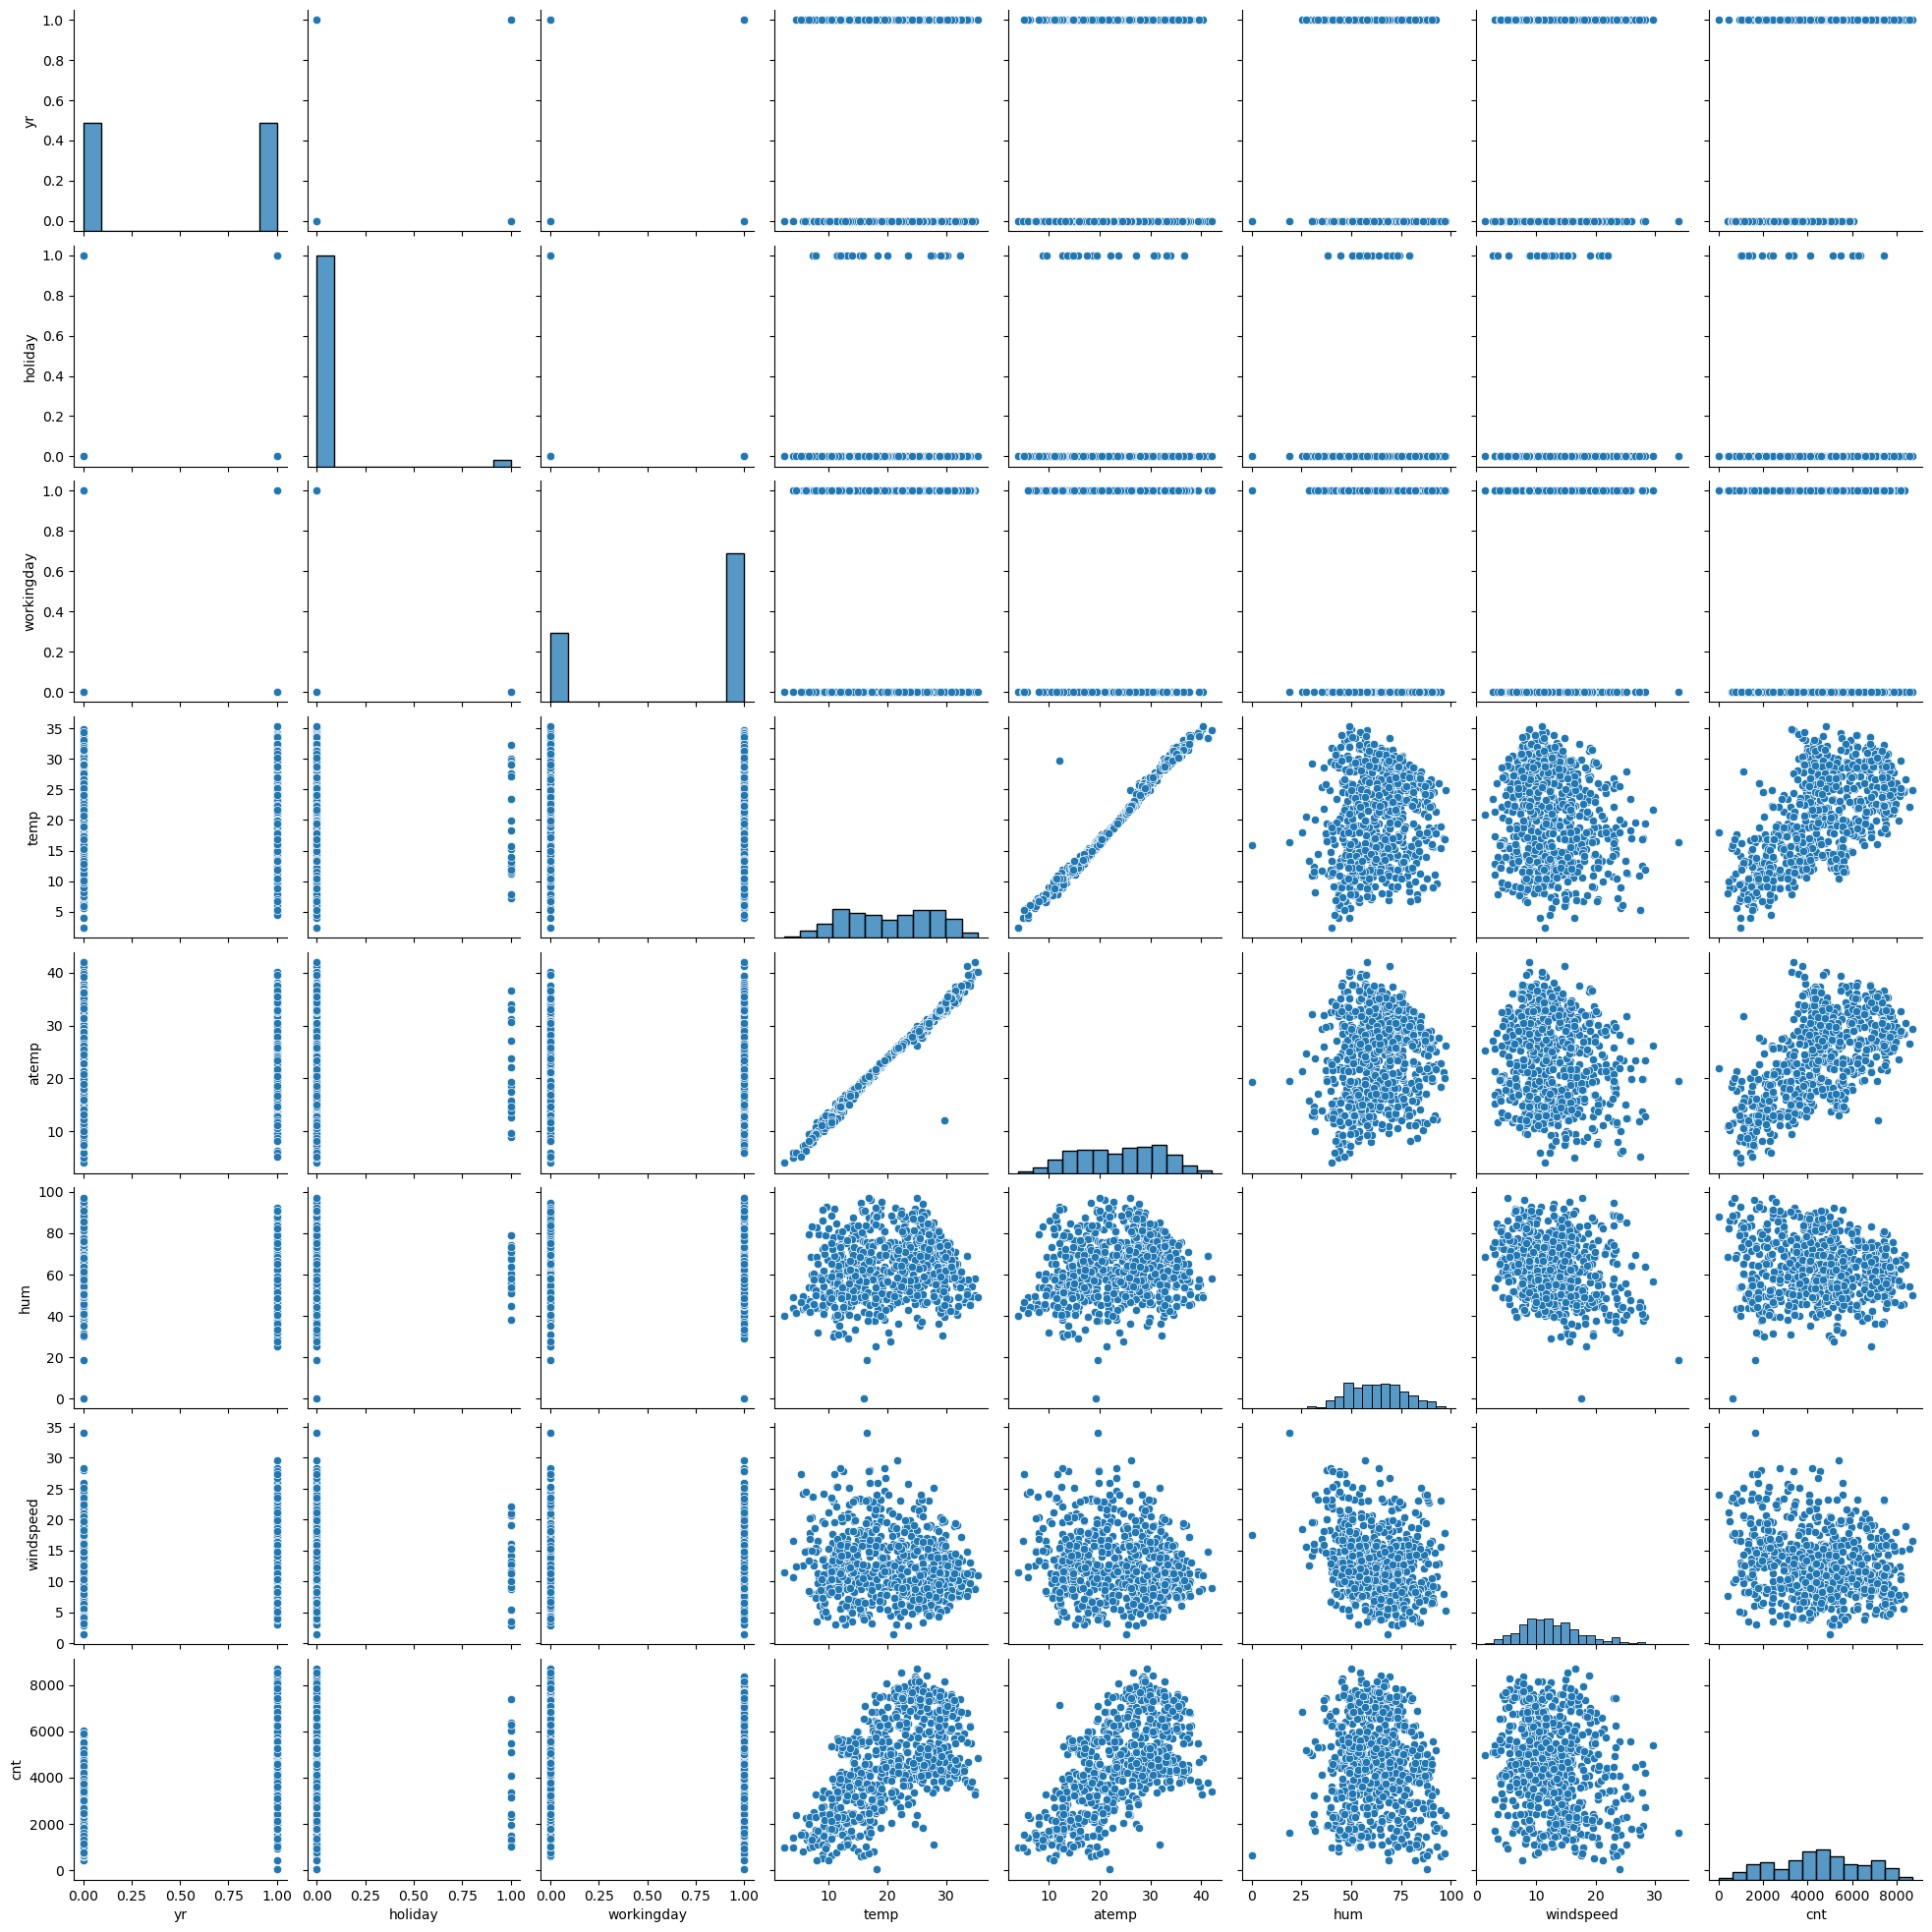

In [33]:
# Plotting a pair plot to find overall relationship with each variable.
sns.pairplot(bike_df)
plt.show()

**Understanding from the above plot**
-   From the above pair plot linear relationship is visible with temp and atemp.

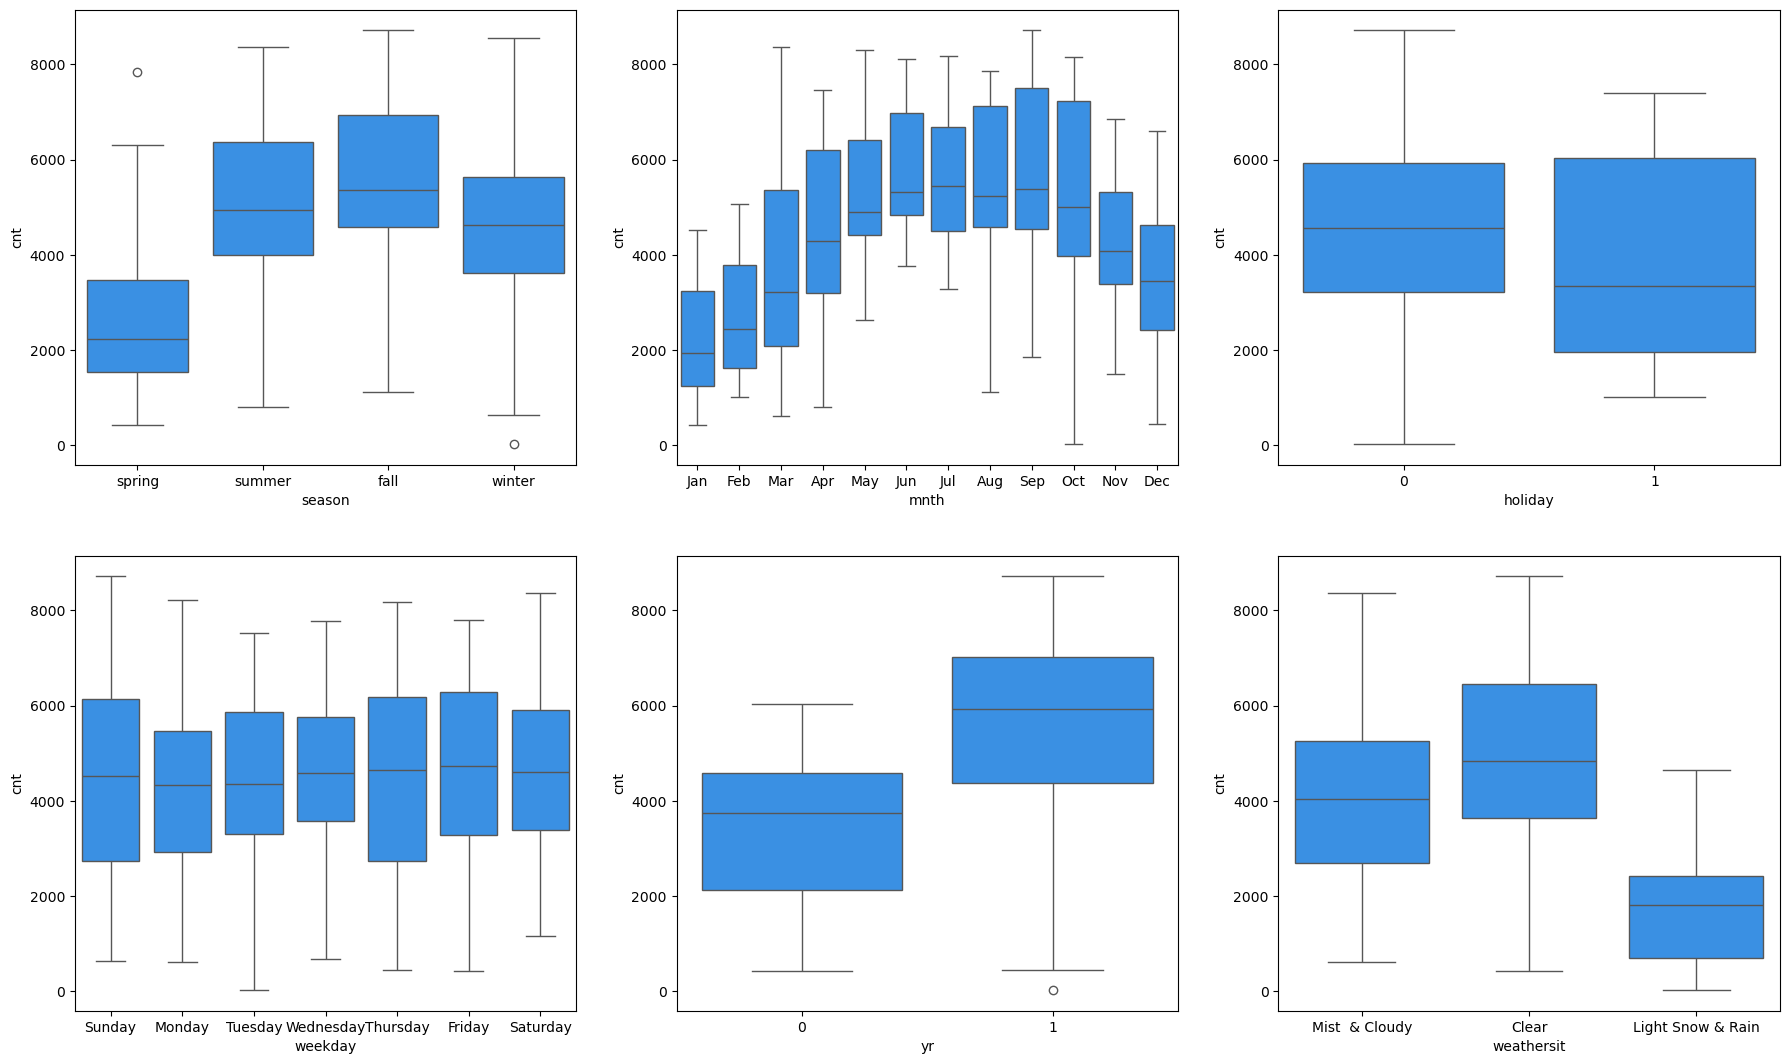

In [35]:
# plotting box plots for categorical variables w.r.t count variable 

plt.figure(figsize=(22,13))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bike_df,color="dodgerblue")
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt', data=bike_df,color="dodgerblue")
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt', data=bike_df,color="dodgerblue")
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt', data=bike_df,color="dodgerblue")
plt.subplot(2,3,5)
sns.boxplot(x='yr',y='cnt', data=bike_df,color="dodgerblue")
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt', data=bike_df,color="dodgerblue")
plt.show()

**Understanding from the above plot**
-   Season wise fall shows higher mean followed by summer. Spring shows least mean value.
-   Month wise Aug, Sep, Oct shows higher mean compared with other months
-   2019 has higher mean compared to 2018.
-   Thru, Fri, Wed and Sun shows higher mean compared to other days
-   clear sky is preferred followed by Mist and least is snow and rain.
-   Non holiday are showing more mean compared to holiday, but their upper quartile matches.

**- Understanding from univariate & bivariate analysis**

- 2019, season, weather & season plays an part in bike rent count.

**- Multivariate**

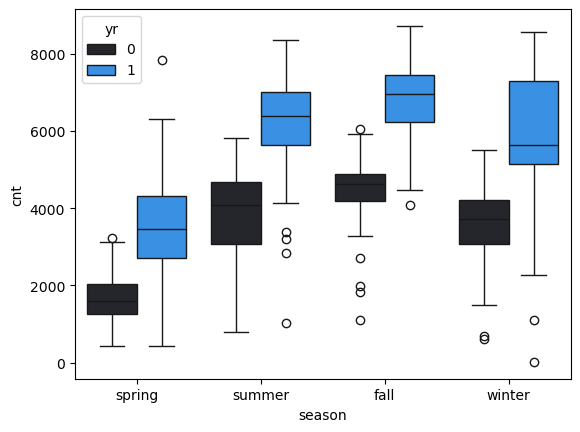

In [39]:
sns.boxplot(y='cnt', x = 'season',data = bike_df, hue = 'yr' ,color = 'dodgerblue')
plt.show()

**- Understanding from univariate & bivariate analysis**

- 2018 which is year 1, shows more bike deman over the various seasons.

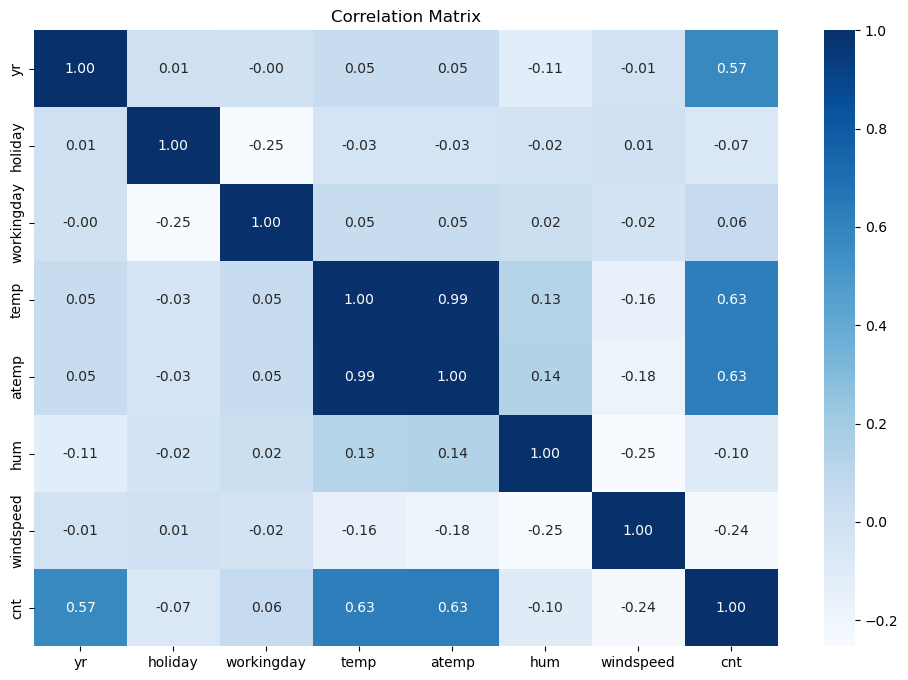

In [41]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(bike_df.corr(numeric_only= True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Understanding from the above plot**
The correlation shows a relationship between atemp, temp, yr. As we don't have much background on these, going ahead with set for RFE. Other variable shows negative correlation

In [43]:
# checking the columns to apply dummies 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
# Getting the statistic of the dataframe to get more insights.
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [45]:
# From the above information, it is evident few column needs a scaling like temp, a temp, hum, windspeed and cnt

In [46]:
#  Creating dummies for the categorical values
bike_df_with_dummies = pd.get_dummies(bike_df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True, dtype='int')
bike_df_with_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


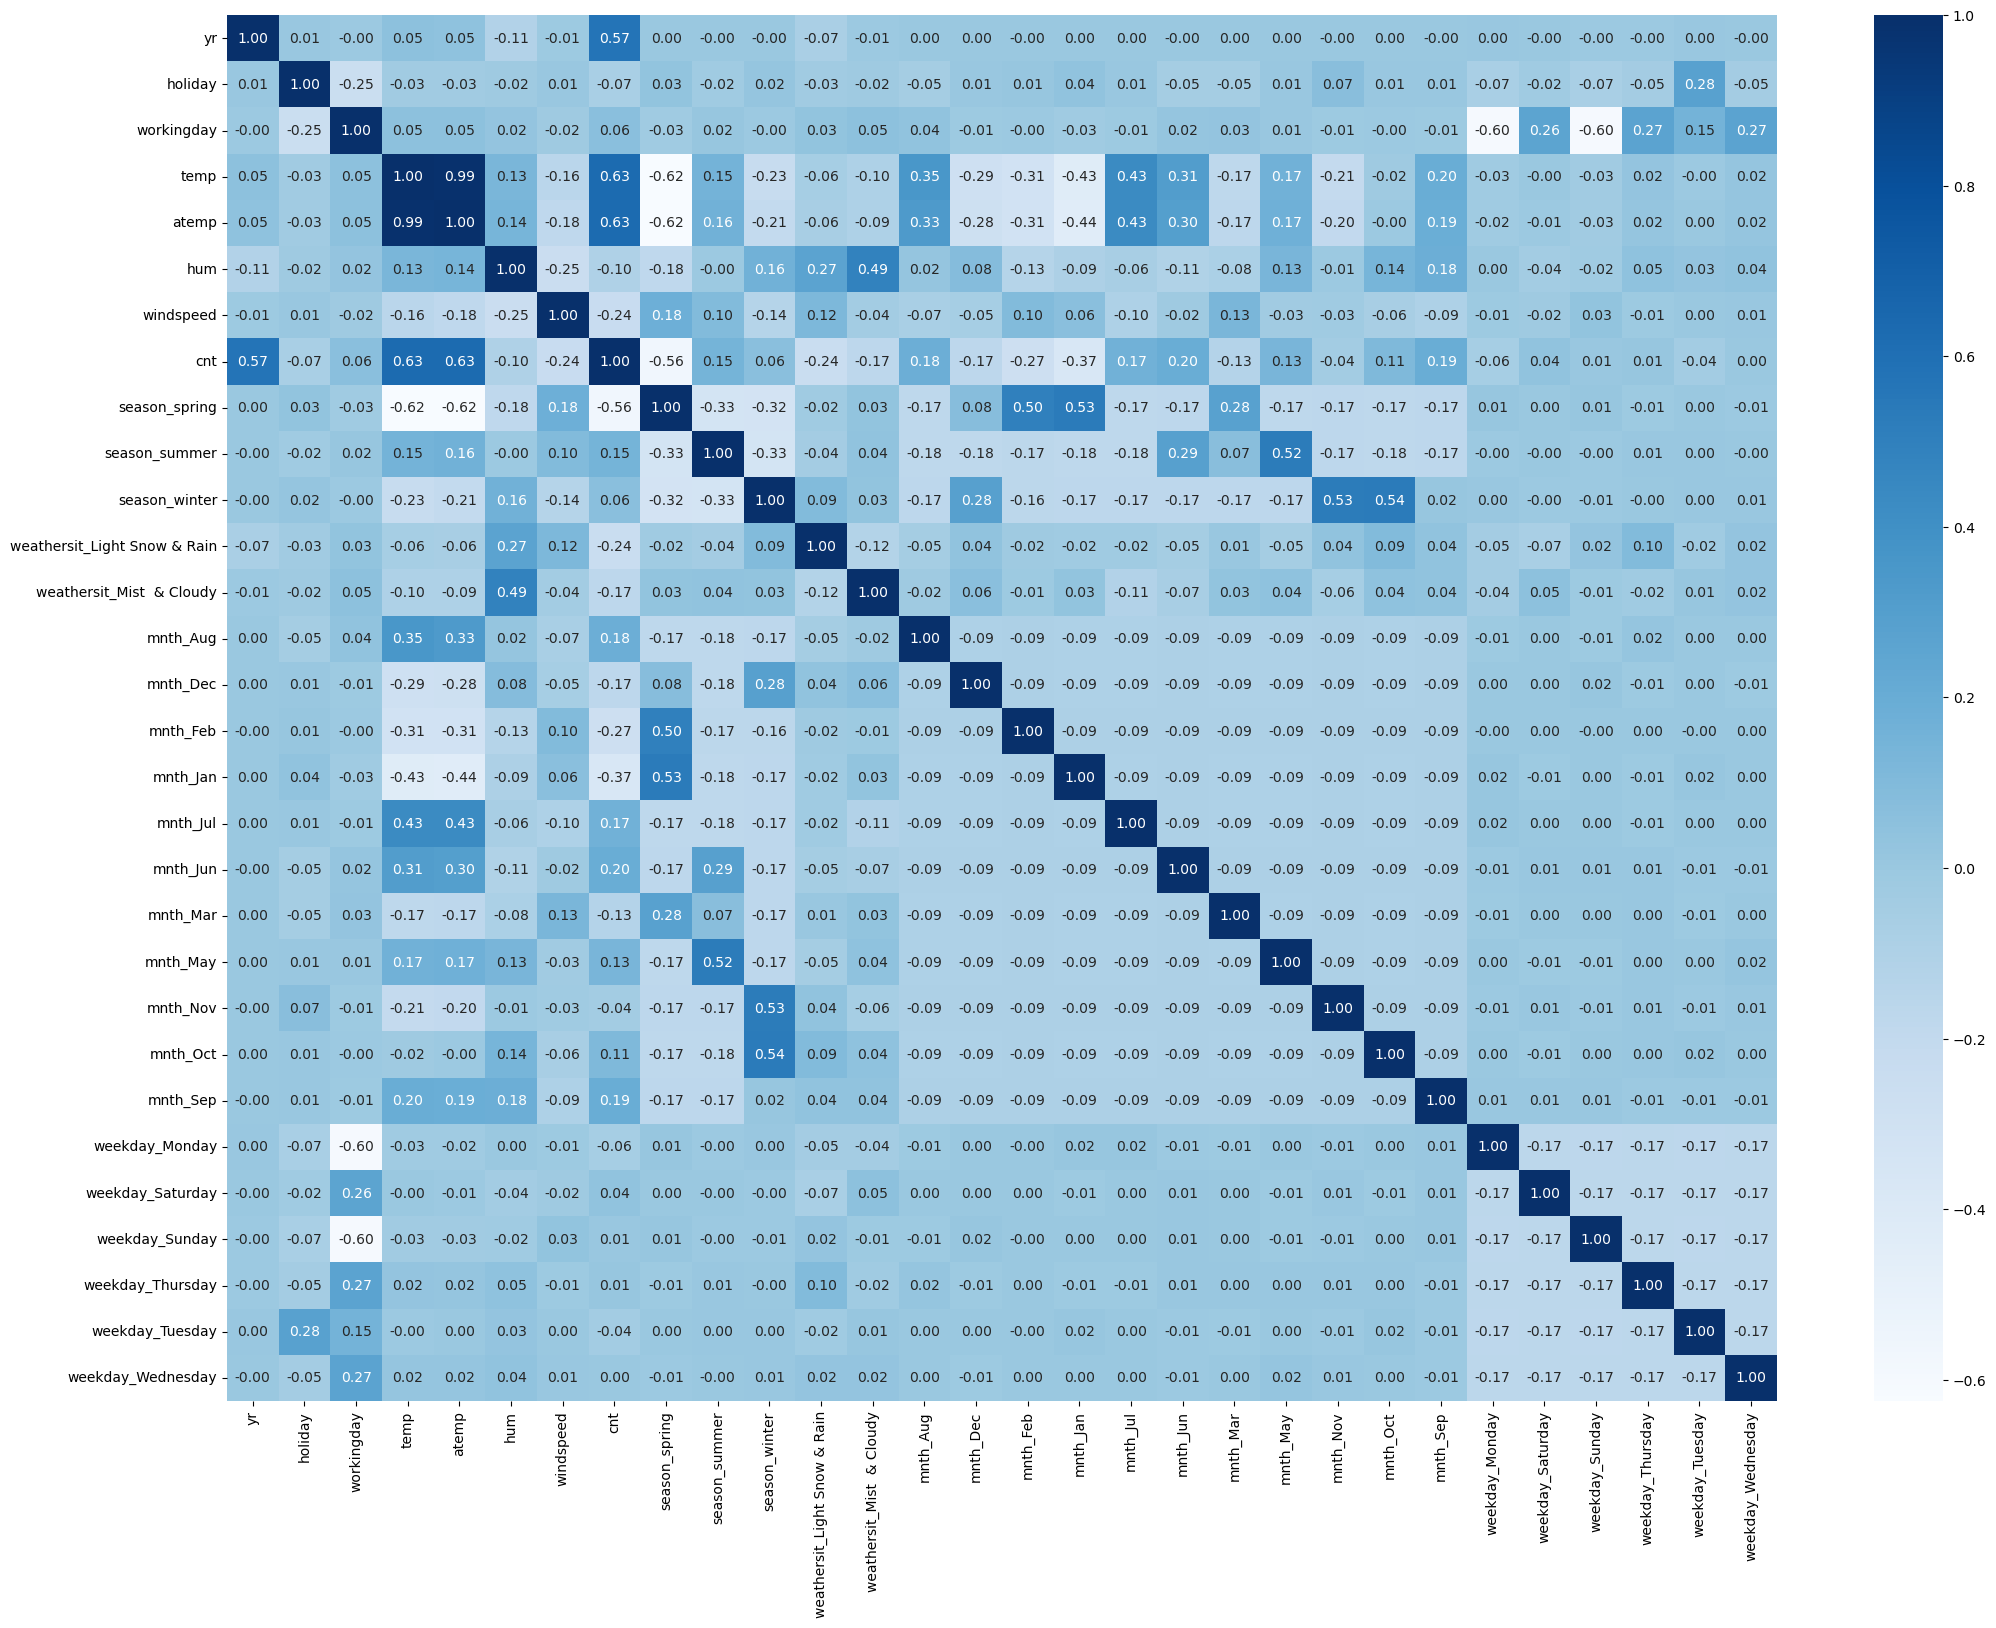

In [47]:
# Plotting the Heatmap for the dataset features from training
plt.figure(figsize=(25,18))
sns.heatmap(bike_df_with_dummies.corr(numeric_only=True),annot=True, cmap="Blues", fmt='.2f')
plt.show()

**Understanding from the above plot**
The correlation shows a relationship between atemp, temp, yr. As we don't have much background on these, going ahead with set for RFE. Other variable shows negative correlation. Some additional correlation is showing with the dummies info

# Step 4: Train Test Split

In [50]:
# Actual train test split with training set with 70% data.
df_train, df_test = train_test_split(bike_df_with_dummies,test_size=0.3, random_state=100)

In [51]:
# checking the size of the train, test dataframe

print(f"df_train->{df_train.shape}")
print(f"df_test->{df_test.shape}")

df_train->(511, 30)
df_test->(219, 30)


# Step 5: Scaling

In [53]:
#  Scaling the variables using minmax-scaler

num_vars_scale = ['hum','windspeed','temp','atemp', 'cnt']

df_train[num_vars_scale] = scaler.fit_transform(df_train[num_vars_scale])
df_test[num_vars_scale] = scaler.transform(df_test[num_vars_scale])  # not fitting the test, only transforming with train statistic information

In [54]:
print(df_train.shape)
print(df_test.shape)

(511, 30)
(219, 30)


In [55]:
# verifying the data shows the scaled version
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [56]:
# creating the X_train, y_train, X_test, y_test variable which will be used for modelling.

y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# verifying the X_train datafram does not have 'cnt'
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Step 6: Feature Selection

In [59]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)  # selecting top 15 features using RFE

In [60]:
# Fitting the model with X_train and y_train
selector = selector.fit(X_train,y_train)

In [61]:
# Getting the list of features from RFE
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist  & Cloudy', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', False, 12),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 11),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9)]

In [62]:
# Using the selected feature to show specific columns from train set
selected_feature = X_train.columns[selector.support_]
print(selected_feature)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow & Rain', 'weathersit_Mist  & Cloudy', 'mnth_Jul',
       'mnth_Oct', 'mnth_Sep', 'weekday_Sunday'],
      dtype='object')


In [63]:
# Using the selected feature to extract specific columns from train set and test set
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]

In [64]:
# Checking the size before first iteration of modeling
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 15)
(511,)
(219, 15)
(219,)


The shape looks good between train x and y, test x and y

# Step 7: Modeling

In [67]:
# Adding a constant to represent the intercept of linear line equation
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [68]:
# Defining a function to calculate VIF
def calculate_VIF(df_name):
    vif_data=pd.DataFrame()
    vif_data["Feature"]=df_name.columns
    vif_data["VIF"]=[variance_inflation_factor(df_name.values,i) for i in range(len(df_name.columns))] 
    print(vif_data)

In [69]:
# calling the VIF function
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  84.662334
1                             yr   1.036010
2                        holiday   1.164115
3                     workingday   1.883990
4                           temp   3.809886
5                            hum   1.907862
6                      windspeed   1.198159
7                  season_spring   5.128991
8                  season_summer   2.629999
9                  season_winter   4.239447
10  weathersit_Light Snow & Rain   1.263490
11     weathersit_Mist  & Cloudy   1.570641
12                      mnth_Jul   1.494984
13                      mnth_Oct   1.526219
14                      mnth_Sep   1.312815
15                weekday_Sunday   1.783369


In [70]:
# apart from constant, the other data looks good, but checking the model summary first before removing any features.

In [71]:
# Creating the first model using the training set(features from RFE)
model1 = sm.OLS(y_train,X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          8.43e-192
Time:                        08:43:57   Log-Likelihood:                 520.65
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -941.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2527      0.036      6.995      0.000       0.182       0.324
yr                               0.2307      0.008     28.862      0.000       0.215       0.246
holiday                         -0.0567      0.027     -2.107      0.036      -0.110      -0.004
workingday                       0.0446      0.012      3.871      0.000       0.022       0.067
temp                             0.5113      0.034     15.039      0.000       0.444       0.578
hum                             -0.1640      0.037     -4.402      0.000      -0.237      -0.091
windspeed                       -0.1833      0.025     -7.229      0.000      -0.233      -0.133
season_spring                   -0.0619      0.021     -2.987      0.003      -0.103      -0.021
season_summer                    0.0522      0.015      3.532      0.000       0.023       0.081
season_winter                    0.0829      0.019      4.433      0.000       0.046       0.120
weathersit_Light Snow & Rain    -0.2517      0.026     -9.626      0.000      -0.303      -0.200
weathersit_Mist  & Cloudy       -0.0571      0.010     -5.516      0.000      -0.077      -0.037
mnth_Jul                        -0.0520      0.018     -2.874      0.004      -0.087      -0.016
mnth_Oct                         0.0390      0.017      2.254      0.025       0.005       0.073
mnth_Sep                         0.0859      0.017      5.189      0.000       0.053       0.118
weekday_Sunday                   0.0541      0.015      3.734      0.000       0.026       0.083
==============================================================================
Omnibus:                       76.064   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.100
Skew:                          -0.742   Prob(JB):                     3.54e-44
Kurtosis:                       5.682   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  84.662334
1                             yr   1.036010
2                        holiday   1.164115
3                     workingday   1.883990
4                           temp   3.809886
5                            hum   1.907862
6                      windspeed   1.198159
7                  season_spring   5.128991
8                  season_summer   2.629999
9                  season_winter   4.239447
10  weathersit_Light Snow & Rain   1.263490
11     weathersit_Mist  & Cloudy   1.570641
12                      mnth_Jul   1.494984
13                      mnth_Oct   1.526219
14                      mnth_Sep   1.312815
15                weekday_Sunday   1.783369


**- Understanding from above summary.**
- R-squared:	0.849
- Adj. R-squared:	0.844
- As the VIF is litter higher than 5, dropping it to compare with other models

In [74]:
#  removing mnth_Feb as this has high VIF value.
X_train_sm = X_train_sm.drop("season_spring",axis=1)
X_test_sm = X_test_sm.drop("season_spring",axis=1)

print(X_train_sm.shape)
print(X_test_sm.shape)

(511, 15)
(219, 15)


In [75]:
# Creating the second model using the training set
model2 = sm.OLS(np.array(y_train),X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.83e-191
Time:                        08:43:57   Log-Likelihood:                 516.09
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1869      0.029      6.477      0.000       0.130       0.244
yr                               0.2291      0.008     28.499      0.000       0.213       0.245
holiday                         -0.0591      0.027     -2.179      0.030      -0.112      -0.006
workingday                       0.0448      0.012      3.855      0.000       0.022       0.068
temp                             0.5876      0.023     25.995      0.000       0.543       0.632
hum                             -0.1759      0.037     -4.713      0.000      -0.249      -0.103
windspeed                       -0.1907      0.025     -7.495      0.000      -0.241      -0.141
season_summer                    0.0831      0.011      7.827      0.000       0.062       0.104
season_winter                    0.1262      0.012     10.582      0.000       0.103       0.150
weathersit_Light Snow & Rain    -0.2450      0.026     -9.332      0.000      -0.297      -0.193
weathersit_Mist  & Cloudy       -0.0544      0.010     -5.232      0.000      -0.075      -0.034
mnth_Jul                        -0.0423      0.018     -2.361      0.019      -0.078      -0.007
mnth_Oct                         0.0315      0.017      1.827      0.068      -0.002       0.065
mnth_Sep                         0.0990      0.016      6.153      0.000       0.067       0.131
weekday_Sunday                   0.0542      0.015      3.709      0.000       0.025       0.083
==============================================================================
Omnibus:                       66.956   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.958
Skew:                          -0.704   Prob(JB):                     1.01e-33
Kurtosis:                       5.270   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  53.168334
1                             yr   1.031257
2                        holiday   1.163112
3                     workingday   1.883950
4                           temp   1.657765
5                            hum   1.885871
6                      windspeed   1.186854
7                  season_summer   1.337372
8                  season_winter   1.696134
9   weathersit_Light Snow & Rain   1.254398
10     weathersit_Mist  & Cloudy   1.558493
11                      mnth_Jul   1.447389
12                      mnth_Oct   1.494243
13                      mnth_Sep   1.220599
14                weekday_Sunday   1.783364


**- Understanding from above summary.**
- R-squared:	0.846
- Adj. R-squared:	0.842
- the p value is higher(statistically significant) for mnth_Oct. The R-squared value and adjusted R-squared value does not show lot of variance, hence deleting the mnth_Oct

In [78]:
#  removing holiday as this has high p value.
X_train_sm = X_train_sm.drop("mnth_Oct",axis=1)
X_test_sm = X_test_sm.drop("mnth_Oct",axis=1)
print(X_train_sm.shape)
print(X_test_sm.shape)

(511, 14)
(219, 14)


In [79]:
# Creating the third model using the training set
model3 = sm.OLS(np.array(y_train),X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.72e-191
Time:                        08:43:57   Log-Likelihood:                 514.37
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -941.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1821      0.029      6.322      0.000       0.125       0.239
yr                               0.2288      0.008     28.404      0.000       0.213       0.245
holiday                         -0.0609      0.027     -2.244      0.025      -0.114      -0.008
workingday                       0.0438      0.012      3.768      0.000       0.021       0.067
temp                             0.5950      0.022     26.694      0.000       0.551       0.639
hum                             -0.1732      0.037     -4.633      0.000      -0.247      -0.100
windspeed                       -0.1880      0.025     -7.386      0.000      -0.238      -0.138
season_summer                    0.0817      0.011      7.696      0.000       0.061       0.103
season_winter                    0.1369      0.010     13.138      0.000       0.116       0.157
weathersit_Light Snow & Rain    -0.2405      0.026     -9.179      0.000      -0.292      -0.189
weathersit_Mist  & Cloudy       -0.0543      0.010     -5.206      0.000      -0.075      -0.034
mnth_Jul                        -0.0456      0.018     -2.547      0.011      -0.081      -0.010
mnth_Sep                         0.0944      0.016      5.927      0.000       0.063       0.126
weekday_Sunday                   0.0533      0.015      3.643      0.000       0.025       0.082
==============================================================================
Omnibus:                       59.191   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.084
Skew:                          -0.646   Prob(JB):                     2.53e-28
Kurtosis:                       5.073   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# VIF calculation
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  52.726484
1                             yr   1.030918
2                        holiday   1.161464
3                     workingday   1.880244
4                           temp   1.604383
5                            hum   1.882878
6                      windspeed   1.183010
7                  season_summer   1.330257
8                  season_winter   1.288511
9   weathersit_Light Snow & Rain   1.243118
10     weathersit_Mist  & Cloudy   1.558397
11                      mnth_Jul   1.433382
12                      mnth_Sep   1.190843
13                weekday_Sunday   1.781460


**- Understanding from above summary.**
- R-squared:	0.845
- Adj. R-squared:	0.841
- the VIF value is highest amongst the list, but still removing to see how the model performs

In [82]:
#  removing col hum as this has moderately high VIF value.
X_train_sm = X_train_sm.drop("hum",axis=1)
X_test_sm = X_test_sm.drop("hum",axis=1)

print(X_train_sm.shape)
print(X_test_sm.shape)

(511, 13)
(219, 13)


In [83]:
# Creating the fourth model using the training set
model4 = sm.OLS(np.array(y_train),X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.01e-188
Time:                        08:43:57   Log-Likelihood:                 503.57
No. Observations:                 511   AIC:                            -981.1
Df Residuals:                     498   BIC:                            -926.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0808      0.019      4.223      0.000       0.043       0.118
yr                               0.2329      0.008     28.503      0.000       0.217       0.249
holiday                         -0.0587      0.028     -2.120      0.035      -0.113      -0.004
workingday                       0.0473      0.012      3.992      0.000       0.024       0.071
temp                             0.5687      0.022     25.859      0.000       0.525       0.612
windspeed                       -0.1548      0.025     -6.211      0.000      -0.204      -0.106
season_summer                    0.0806      0.011      7.441      0.000       0.059       0.102
season_winter                    0.1281      0.010     12.257      0.000       0.108       0.149
weathersit_Light Snow & Rain    -0.2880      0.025    -11.708      0.000      -0.336      -0.240
weathersit_Mist  & Cloudy       -0.0819      0.009     -9.401      0.000      -0.099      -0.065
mnth_Jul                        -0.0383      0.018     -2.108      0.036      -0.074      -0.003
mnth_Sep                         0.0903      0.016      5.565      0.000       0.058       0.122
weekday_Sunday                   0.0587      0.015      3.939      0.000       0.029       0.088
==============================================================================
Omnibus:                       59.483   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.580
Skew:                          -0.652   Prob(JB):                     3.26e-28
Kurtosis:                       5.060   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# VIFcalculation

calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  22.345946
1                             yr   1.018662
2                        holiday   1.161105
3                     workingday   1.872523
4                           temp   1.500107
5                      windspeed   1.089010
6                  season_summer   1.329560
7                  season_winter   1.246301
8   weathersit_Light Snow & Rain   1.052570
9      weathersit_Mist  & Cloudy   1.046682
10                      mnth_Jul   1.422456
11                      mnth_Sep   1.187140
12                weekday_Sunday   1.770465


**- Understanding from above summary.**
- model4 is not deteriorating the model score so going ahead with further feature reduction to mind the best model.

In [86]:
# dropping working day as as it has the highest VIF in the list. 
X_train_sm = X_train_sm.drop("workingday",axis=1)
X_test_sm = X_test_sm.drop("workingday",axis=1)

print(X_train_sm.shape)
print(X_test_sm.shape)

(511, 12)
(219, 12)


In [87]:
# training another model with above features
model5 = sm.OLS(np.array(y_train),X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          6.45e-186
Time:                        08:43:57   Log-Likelihood:                 495.52
No. Observations:                 511   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -916.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1184      0.017      7.002      0.000       0.085       0.152
yr                               0.2332      0.008     28.121      0.000       0.217       0.249
holiday                         -0.0971      0.026     -3.684      0.000      -0.149      -0.045
temp                             0.5714      0.022     25.615      0.000       0.528       0.615
windspeed                       -0.1558      0.025     -6.162      0.000      -0.206      -0.106
season_summer                    0.0804      0.011      7.321      0.000       0.059       0.102
season_winter                    0.1262      0.011     11.905      0.000       0.105       0.147
weathersit_Light Snow & Rain    -0.2830      0.025    -11.352      0.000      -0.332      -0.234
weathersit_Mist  & Cloudy       -0.0800      0.009     -9.059      0.000      -0.097      -0.063
mnth_Jul                        -0.0410      0.018     -2.225      0.027      -0.077      -0.005
mnth_Sep                         0.0914      0.016      5.548      0.000       0.059       0.124
weekday_Sunday                   0.0197      0.011      1.727      0.085      -0.003       0.042
==============================================================================
Omnibus:                       57.829   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.009
Skew:                          -0.674   Prob(JB):                     1.29e-24
Kurtosis:                       4.831   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  16.939118
1                             yr   1.018585
2                        holiday   1.021058
3                           temp   1.498657
4                      windspeed   1.088889
5                  season_summer   1.329550
6                  season_winter   1.243537
7   weathersit_Light Snow & Rain   1.049851
8      weathersit_Mist  & Cloudy   1.043463
9                       mnth_Jul   1.420488
10                      mnth_Sep   1.186824
11                weekday_Sunday   1.010958


**- Understanding from above summary.**
- R-squared:	0.833
- Adj. R-squared:	0.829
- The model is showing improvement compared to previous model, this will further will be tested.

In [90]:
# dropping weekday_Sundayy as the p value is greater than 0.05 
X_train_sm = X_train_sm.drop("weekday_Sunday",axis=1)
X_test_sm = X_test_sm.drop("weekday_Sunday",axis=1)

print(X_train_sm.shape)
print(X_test_sm.shape)

(511, 11)
(219, 11)


In [91]:
# training another model with above features
model6 = sm.OLS(np.array(y_train),X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.76e-186
Time:                        08:43:58   Log-Likelihood:                 494.00
No. Observations:                 511   AIC:                            -966.0
Df Residuals:                     500   BIC:                            -919.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1216      0.017      7.227      0.000       0.089       0.155
yr                               0.2327      0.008     28.026      0.000       0.216       0.249
holiday                         -0.1004      0.026     -3.813      0.000      -0.152      -0.049
temp                             0.5702      0.022     25.523      0.000       0.526       0.614
windspeed                       -0.1538      0.025     -6.077      0.000      -0.204      -0.104
season_summer                    0.0802      0.011      7.286      0.000       0.059       0.102
season_winter                    0.1264      0.011     11.902      0.000       0.106       0.147
weathersit_Light Snow & Rain    -0.2826      0.025    -11.311      0.000      -0.332      -0.233
weathersit_Mist  & Cloudy       -0.0799      0.009     -9.029      0.000      -0.097      -0.062
mnth_Jul                        -0.0405      0.018     -2.195      0.029      -0.077      -0.004
mnth_Sep                         0.0916      0.017      5.552      0.000       0.059       0.124
==============================================================================
Omnibus:                       52.426   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.599
Skew:                          -0.605   Prob(JB):                     3.19e-23
Kurtosis:                       4.844   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
calculate_VIF(X_train_sm)

                         Feature        VIF
0                          const  16.726620
1                             yr   1.017642
2                        holiday   1.015599
3                           temp   1.497145
4                      windspeed   1.086580
5                  season_summer   1.329341
6                  season_winter   1.243381
7   weathersit_Light Snow & Rain   1.049729
8      weathersit_Mist  & Cloudy   1.043411
9                       mnth_Jul   1.420163
10                      mnth_Sep   1.186742


**- Understanding from above summary.**
- R-squared:	0.832
- Adj. R-squared:	0.829
- The model is showing improvement compared to previous model. Now the VIF values are less and p values are also significant.
- Going ahead with this model testing.

# Step 8: Residual Analysis

(511, 11)
(511, 11)
(511, 11)


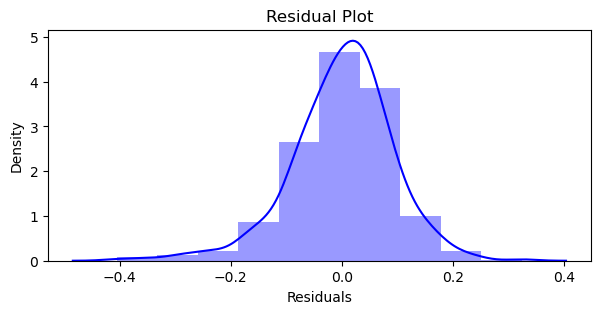

In [95]:
# Plotting residuals to check for any patterns and if mean is around 0
y_train_pred=model6.predict(res6.params,X_train_sm)
print(X_train_sm.shape)
print(X_train_sm.shape)
print(X_train_sm.shape)

res=y_train-y_train_pred

plt.figure(figsize=(7, 3))
sns.distplot(res, color="b", bins = 10, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [96]:
# multicollinearity is not showing up in below VIF from model3

calculate_VIF(X_train_sm)


                         Feature        VIF
0                          const  16.726620
1                             yr   1.017642
2                        holiday   1.015599
3                           temp   1.497145
4                      windspeed   1.086580
5                  season_summer   1.329341
6                  season_winter   1.243381
7   weathersit_Light Snow & Rain   1.049729
8      weathersit_Mist  & Cloudy   1.043411
9                       mnth_Jul   1.420163
10                      mnth_Sep   1.186742


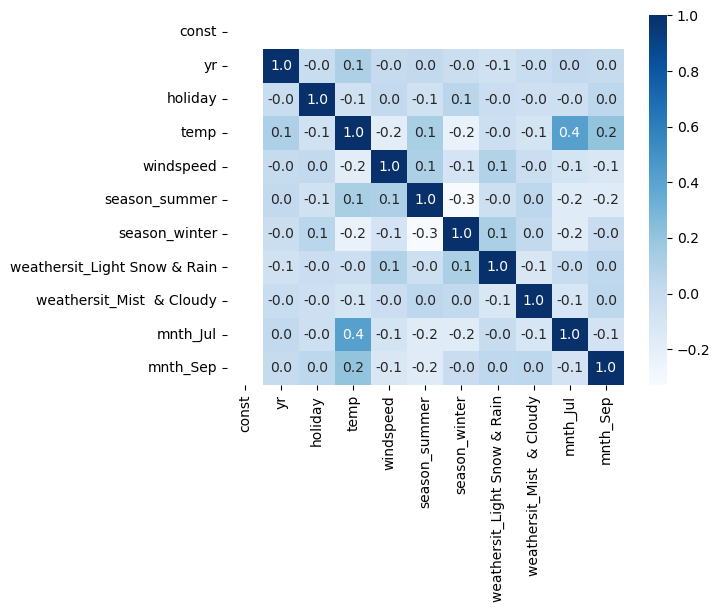

In [97]:
# Plotting the Heatmap for the model3 features 
sns.heatmap(X_train_sm.corr(numeric_only=True),annot=True, cmap="Blues", fmt='.1f')
plt.show()

The correlation is reduced which reflected from the above plot.

# Step 9: Prediction

In [100]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   holiday                       219 non-null    int64  
 3   temp                          219 non-null    float64
 4   windspeed                     219 non-null    float64
 5   season_summer                 219 non-null    int32  
 6   season_winter                 219 non-null    int32  
 7   weathersit_Light Snow & Rain  219 non-null    int32  
 8   weathersit_Mist  & Cloudy     219 non-null    int32  
 9   mnth_Jul                      219 non-null    int32  
 10  mnth_Sep                      219 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 15.4 KB


In [101]:
# Predicting using the 6th model
y_test_pred = res6.predict(X_test_sm)

Train R2 0.8320, Test R2 0.7931


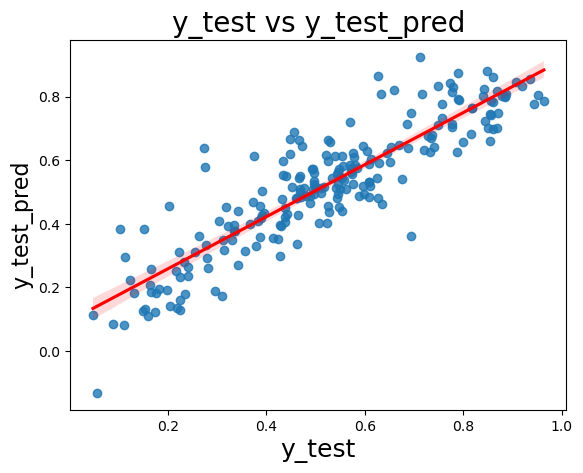

In [102]:
# Plotting the predicted value with test value and calculating the R2 Score

sns.regplot(x=y_test, y=y_test_pred,line_kws={'color':'red'},)
plt.title('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R2 {r2_train:.4f}, Test R2 {r2_test:.4f}")

From the above calculation the r2_score for the test set is 0.79

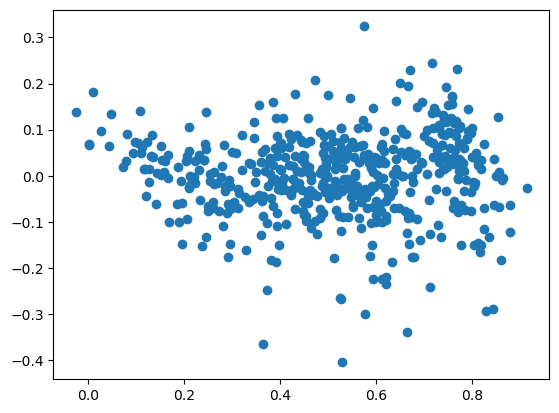

In [104]:
# Plotting the y predicted with residue shows the dispersion around mean 0, which is good.
plt.scatter(y_train_pred, res)

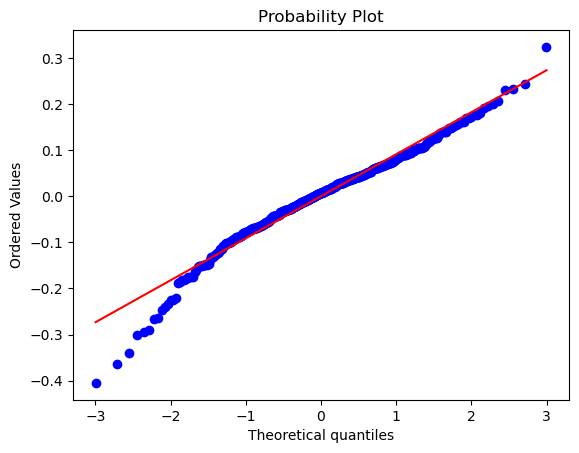

In [105]:
# plotting the QQ plot 
# A QQ plot is a scatterplot created by plotting two sets of quantiles against one another. 
# If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

probplot(res, plot=plt)
plt.show()

Line is almost a straight line

In [107]:
#Calculating RMSE (root mean square error)
print(f"Test set RMSE = {np.sqrt(round(mean_squared_error(y_test, y_test_pred),4)):.4f}") # test set
print(f"Train set RMSE = {np.sqrt(round(mean_squared_error(y_train, y_train_pred),4)):.4f}") # train set

Test set RMSE = 0.0990
Train set RMSE = 0.0922


In [108]:
# Below are the coefficients and constant value
res6.params

const                           0.121637
yr                              0.232747
holiday                        -0.100437
temp                            0.570161
windspeed                      -0.153827
season_summer                   0.080211
season_winter                   0.126384
weathersit_Light Snow & Rain   -0.282566
weathersit_Mist  & Cloudy      -0.079880
mnth_Jul                       -0.040538
mnth_Sep                        0.091623
dtype: float64

In [190]:
# the line equation/ Bike Demand after the model analysis is below.
Eq = ""
for idx, coef in enumerate (res6.params):
    Eq = Eq +" + "+ str(res6.params.index[idx]) +"*"+ str(round(coef,2))
Eq= Eq[3:]

print(f"Equation of line becomes/Bike Demand = {Y}")

Equation of line becomes/Bike Demand = const*0.12 + yr*0.23 + holiday*-0.1 + temp*0.57 + windspeed*-0.15 + season_summer*0.08 + season_winter*0.13 + weathersit_Light Snow & Rain*-0.28 + weathersit_Mist  & Cloudy*-0.08 + mnth_Jul*-0.04 + mnth_Sep*0.09


# Step 10: Model Summary

In [111]:
model_summary = pd.DataFrame({"Model Metrics":["R-Squared Value","RMSE"],
                         "Train Set":[0.8320,0.0990],
                         "Test Set":[0.7931,0.0922]})

In [112]:
model_summary

,Model Metrics,Train Set,Test Set
0,R-Squared Value,0.832,0.7931
1,RMSE,0.099,0.0922


# Step 11: Conclusion

- Year progression show increase in bike demand in 2019.
- Temperature is a strong factor, demand goes down in low temperatures.
- Summer and winter shows more bike demand compared to other seasons.
- Rain, cloudy and misty weather decreases the demand, clear weather is preferred.
- Holiday has a negative coefficient, meaning demand goes down on holidays.
- Few months are preferred like Sep which has a positive coefficient which matches with EDA analysis.
- Wind speed shows a negative coefficient, demand goes down with wind speed is more.
- The negative sign in coefficient shows the inverse relationship between the predictor and bike demand.
- The positive sign in coefficient shows the direct relationship between the predictor and bike demand.
- const (0.121637): This is the intercept term. It represents the expected value of the dependent variable when all other features are zero. In this case, the baseline value is 0.121637.
- yr (0.232747): This coefficient suggests that for each additional year, the dependent variable increases by 0.232747 units, assuming all other variables remain constant.
- holiday (-0.100437): This negative coefficient indicates that if the day is a holiday, the dependent variable decreases by 0.100437 units, holding other factors constant.
- temp (0.570161): A positive coefficient for temperature means that for each unit increase in temperature, the dependent variable increases by 0.570161 units, assuming other variables are constant.
- windspeed (-0.153827): This negative coefficient suggests that higher wind speeds are associated with a decrease in the dependent variable by 0.153827 units, all else being equal.
- season_summer (0.080211): This positive coefficient indicates that during the summer season, the dependent variable increases by 0.080211 units compared to the reference season, holding other factors constant.
- season_winter (0.126384): Similarly, during the winter season, the dependent variable increases by 0.126384 units compared to the reference season, assuming other variables remain constant.
- weathersit_Light Snow & Rain (-0.282566): This negative coefficient suggests that light snow and rain conditions decrease the dependent variable by 0.282566 units compared to the reference weather situation, holding other factors constant.
- weathersit_Mist & Cloudy (-0.079880): Mist and cloudy conditions are associated with a decrease in the dependent variable by 0.079880 units compared to the reference weather situation, assuming other variables are constant.
- mnth_Jul (-0.040538): This negative coefficient indicates that in July, the dependent variable decreases by 0.040538 units compared to the reference month, holding other factors constant.
- mnth_Sep (0.091623): In September, the dependent variable increases by 0.091623 units compared to the reference month, assuming other variables remain constant.